In [2]:
import matplotlib
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from timeit import default_timer as timer

np.random.seed(42)
plt.rcParams['figure.dpi'] = 150   #aumentare la definizione dei grafici 

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


<function matplotlib.pyplot.show(close=None, block=None)>

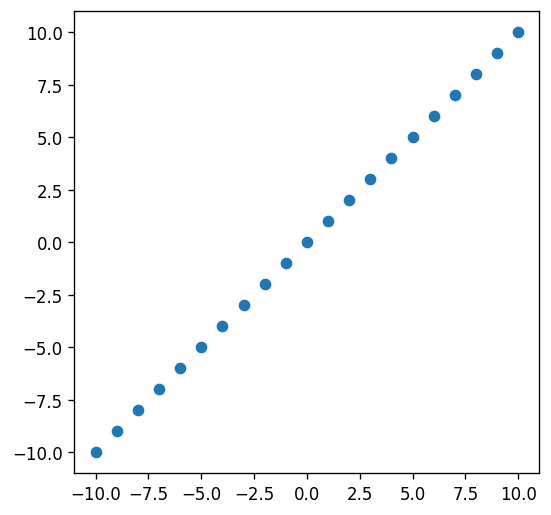

In [4]:
x1 = np.linspace(-10, 10, 21)
x2 = np.linspace(-10, 10, 21)

print(x1)
print(x2)

plt.figure(figsize=(5, 5), dpi = 120)
plt.scatter(x1, x2)
plt.show

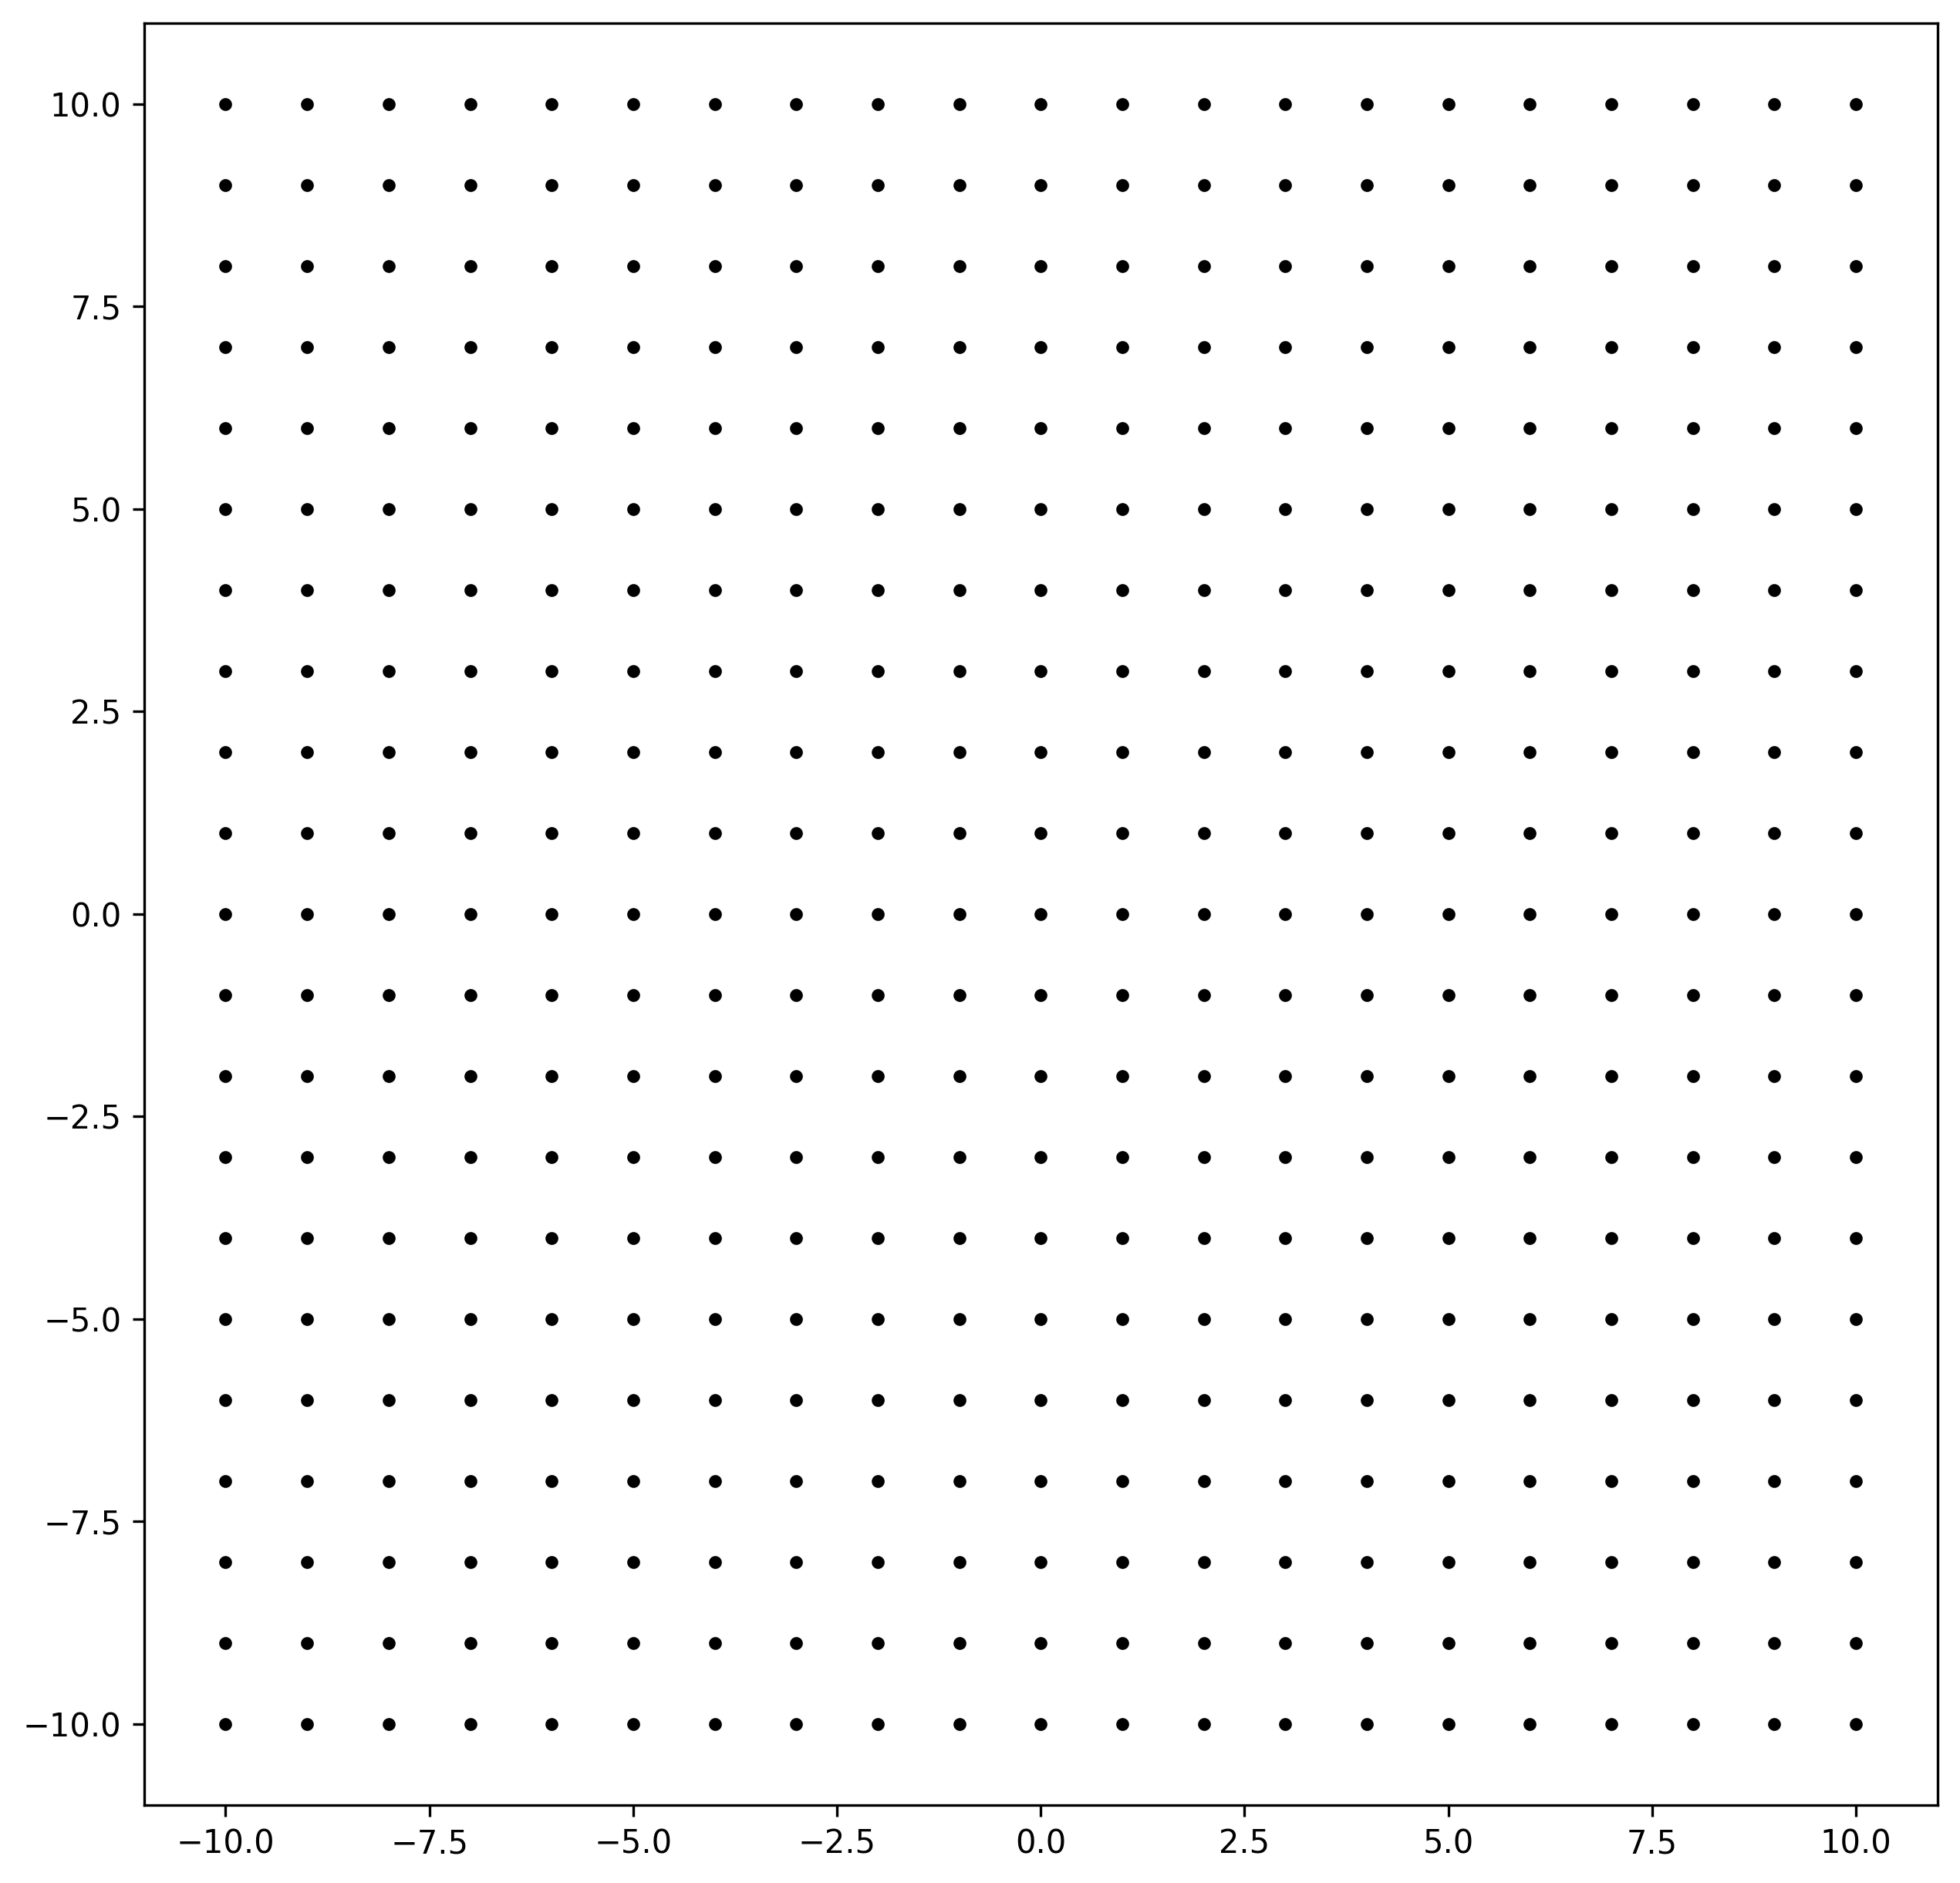

In [5]:
X1, X2 = np.meshgrid(x1, x2)

plt.figure(figsize = (10, 10), dpi = 300)
plt.plot(X1, X2, marker='.', color = 'k', linestyle= 'none')
plt.show()

C:\Users\Claud\AppData\Local\Temp\ipykernel_7976\201382107.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('viridis')


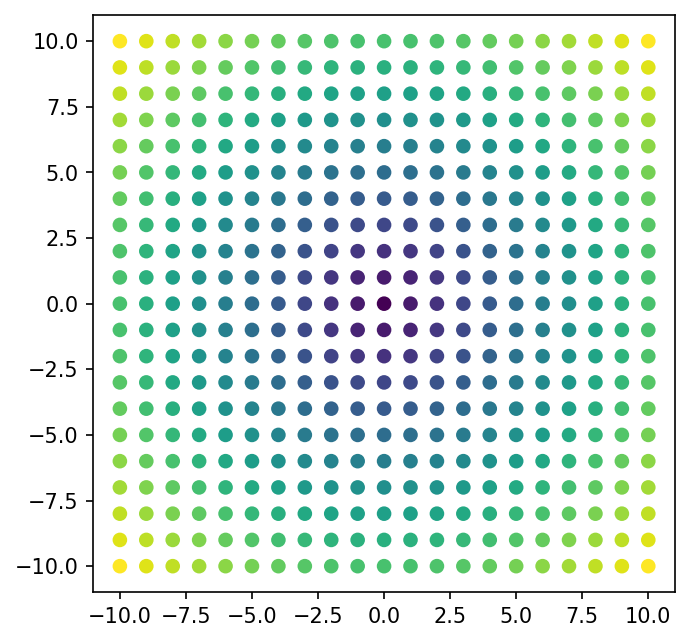

In [8]:
Y = np.sqrt(np.square(X1) + np.square(X2))
cm = plt.cm.get_cmap('viridis')

plt.figure(figsize=(5,5), dpi = 150)
plt.scatter(X1, X2, c= Y, cmap=cm)
plt.show()

In [9]:
print(X1[0][0])
print(X2[0][0])
print(Y[0][0])

print(X1[5][5])
print(X2[5][5])
print(Y[5][5])

-10.0
-10.0
14.142135623730951
-5.0
-5.0
7.0710678118654755


C:\Users\Claud\AppData\Local\Temp\ipykernel_7976\1579278828.py:3: UserWarning: The following kwargs were not used by contour: 'linestyle'
  cp = plt.contour(X1, X2, Y, colors= 'black', linestyle = 'dashed', linewidths = 1)


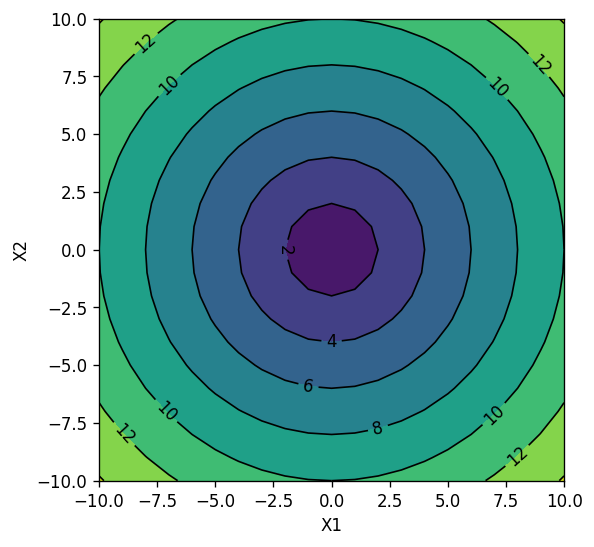

In [11]:
plt.figure(figsize=(5,5), dpi = 120)
# per tracciare le linee di contorno di una superficie tridimensionale su un grafico bidimensionale
cp = plt.contour(X1, X2, Y, colors= 'black', linestyle = 'dashed', linewidths = 1)
plt.clabel(cp, inline= 1, fontsize=10)
cp = plt.contourf(X1, X2, Y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

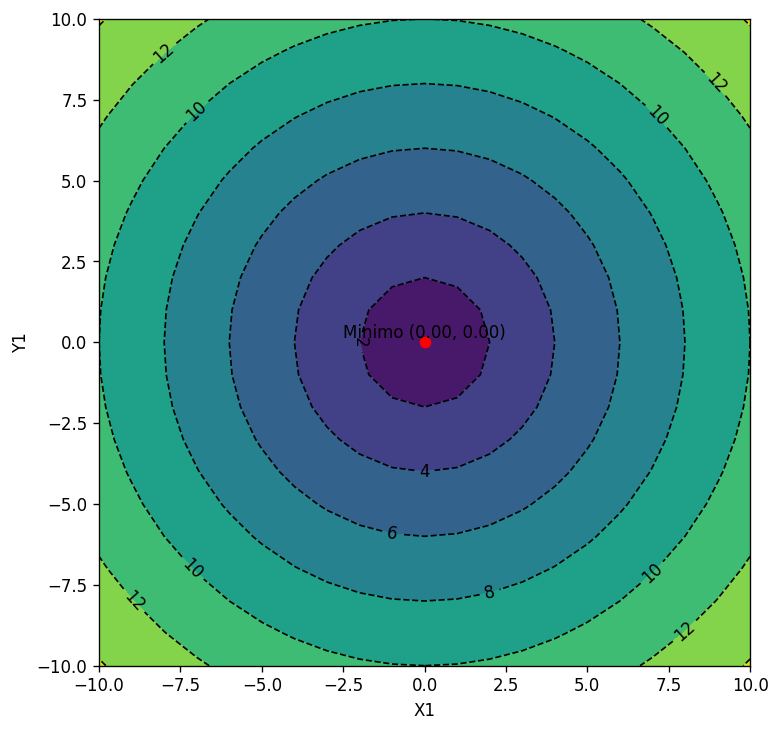

In [25]:
minimo = np.argmin(Y)  #restituisce valore minimo

indexes = np.unravel_index(minimo, shape=Y.shape) #converte l'idice di un elemento in una tupla con la posizione dell elemento

min_x, min_y = x1[indexes[0]], x2[indexes[0]]

plt.figure(figsize = (7, 7), dpi=120)
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)

plt.plot(min_x, min_y, 'ro', label='Minimum')
plt.text(min_x, min_y, f'Minimo ({min_x:.2f}, {min_y:.2f})', ha='center', va='bottom')

plt.clabel(cp, inline= 1, fontsize=10)
cp = plt.contourf(X1, X2, Y)

plt.xlabel('X1')
plt.ylabel('Y1')

plt.show()

In [28]:
data = pd.read_csv(r'C:\Users\Claud\OneDrive\Desktop\project-a\MASTER CLASS MACHINE LEARNING\Regressione lineare\data\data_01.csv', header = None)

data.head()

,0,1
0,1.1,1.0
1,0.9,1.0
2,1.9,2.1
3,2.1,1.9
4,2.9,3.1


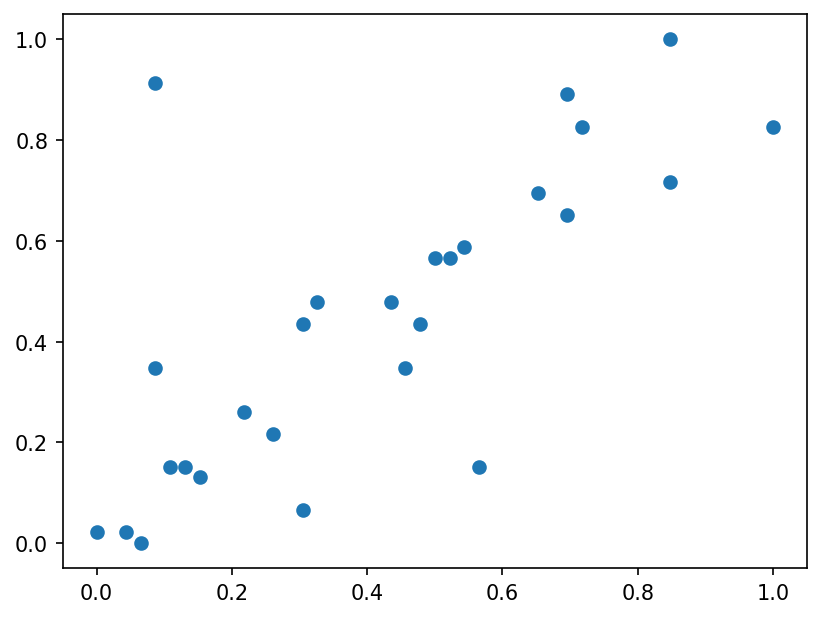

In [38]:
y = np.expand_dims(data.iloc[:,1], axis=1)
x = np.expand_dims(data.iloc[:,0], axis=1)

def norm(arr):
    x_max = max(arr)
    x_min = min(arr)
    norm = np.zeros(shape = (len(arr), 1))
    for i, x in enumerate(arr):
        norm[i] = (x - x_min) / (x_max - x_min)
    return norm, x_min, x_max

x_scaled, x_min, x_max = norm(x)
y_scaled, y_min, y_max = norm(y)

plt.scatter(x_scaled, y_scaled)
plt.show()


Text(0.5, 1.0, 'Regressione Lineare dati di test e addestramento ')

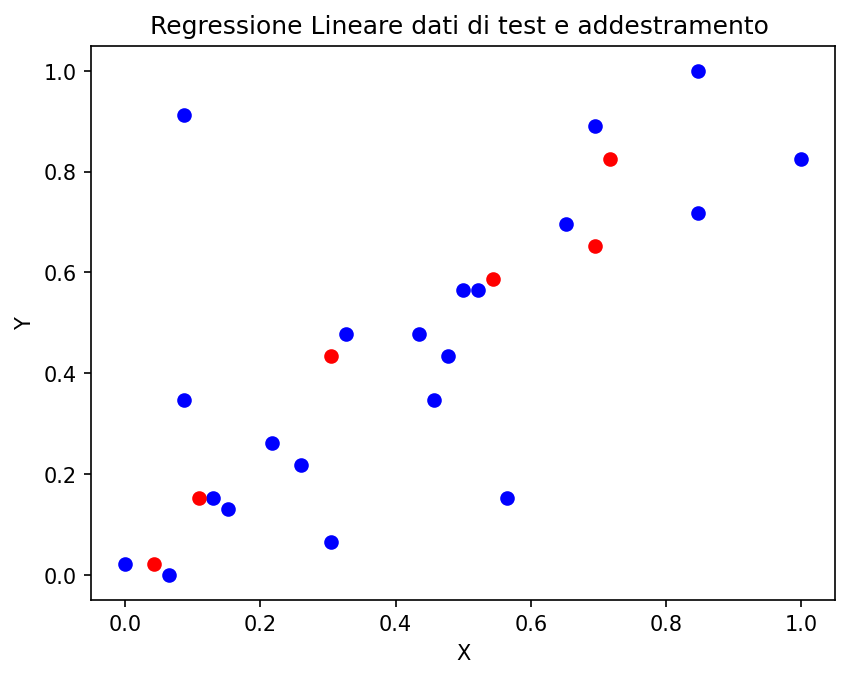

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2)

plt.scatter(x_train, y_train, color='blue', label= 'training set')
plt.scatter(x_test, y_test, color='red', label='Test Set')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regressione Lineare dati di test e addestramento ')

In [55]:
def ipotesi(x, w):   #Theta0 + Theta1 * X
    return w[0] + w[1] * x

def get_error(y, y_hat):
    return y - y_hat

def get_loss(y, y_hat): #MSE 
    return (1/len(y)) * np.sum(np.square(get_error(y, y_hat)))

def gradient_results(x, w, y):
    n = len(x)
    y_hat = ipotesi(x, w)
    errore = get_error(y, y_hat)
    costo = get_loss(y, y_hat)
    
    grad_w1 = (-2 / n) * np.sum(x * (y - y_hat))
    grad_w0 = (-2 / n) * np.sum(y - y_hat)
    g = np.array([grad_w0, grad_w1])
    return g, costo

In [78]:
def plot_contour(X, y, history):
    # Create a meshgrid for contour plot
    w0 = np.linspace(-history[-1][0] * 5, history[-1][0] * 5, 1000) 
    # prendo l'ultimo valore del termine noto e mi creo un elenco di 1000 valori compresi fra -q * 5 e + q * 5
    
    
    w1 = np.linspace(-history[-1][1] * 5, history[-1][1] * 5, 1000)
    # prendo l'ultimo valore del coefficente angolare e mi creo un elenco di 1000 valori compresi fra -m * 5 e + m * 5
    
    # w0_mesh, w1_mesh = np.meshgrid(w0, w1)
    
    mse_vals = np.zeros(shape=(w0.size, w1.size))
    
    for i, value1 in enumerate(w0):
        for j, value2 in enumerate(w1):
            w_temp = np.array((value1,value2))  
            predictions = ipotesi(x_scaled, w_temp)
            error = get_loss(y, predictions)
            mse_vals[i, j] = error
    # questo doppio ciclo for mi serve "solo" per poter disegnare le curve di livello nel piano identificato da w0 e w1


    # Get the minimum coords
    
    minimum = np.argmin(mse_vals)
    indexes = np.unravel_index(minimum, shape=mse_vals.shape)
    min_x, min_y = w0[indexes[0]], w1[indexes[0]]
    
    # Plot the contour plot
    plt.figure(figsize=(10, 10), dpi=300)
    plt.contourf(w0, w1, mse_vals, levels=10)

    plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
    plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
    
    CS = plt.contour(w0, w1, mse_vals, levels=10, linewidths=1,colors='black')

    
    plt.clabel(CS, inline=1, fontsize=8)
    
    for i in range(len(history) - 1):
        plt.annotate('', 
             xy=history[i + 1, :], 
             xytext=history[i, :],
             arrowprops={
                 'arrowstyle': '->', 
                 'color': 'r' if i < len(history) - 2 else "w", 
                 'lw': 1
             },
             va='center', 
             ha='center'
        )
        
    # Plot the minimum
    plt.plot(min_x, min_y, 'ro', label='Minimum')
    plt.text(min_x, min_y, f'Minimum ({min_x:.2f}, {min_y:.2f})', ha='center', va='bottom')

    
    # plt.axis("equal")
    plt.title(f"Contour Plot of Gradient Descent ({history.shape[0]} parameters updates)")
    plt.xlabel("w0")
    plt.ylabel("w1")
    plt.savefig("contour.png")
    plt.show()

## Batch Gradient Descent

La **Batch Gradient Descent** aggiorna i parametri del modello utilizzando i gradienti calcolati sull'intero dataset di addestramento in ogni iterazione. Nel codice fornito, i gradienti (dm e dc) vengono calcolati utilizzando **l'intero dataset**; i parametri (m e c) vengono aggiornati di conseguenza.

La **Batch Gradient Descent** può essere computazionalmente costosa per set di dati di grandi dimensioni poiché richiede l'elaborazione dell'intero set di dati in ogni iterazione. Tuttavia, garantisce **la convergenza al minimo globale per le funzioni di costo convesse**.

Se si dispone di un set di dati di grandi dimensioni e si desidera implementare una variante più efficiente dal punto di vista computazionale della discesa del gradiente, è possibile esplorare la discesa del gradiente stocastico (SGD) o la discesa del gradiente mini-batch, che implicano l'aggiornamento dei parametri utilizzando un sottoinsieme dei dati in ogni iterazione. Queste varianti spesso convergono più velocemente ma possono introdurre più varianza negli aggiornamenti dei parametri.

Errore valore minimo: 0.03960413522345456


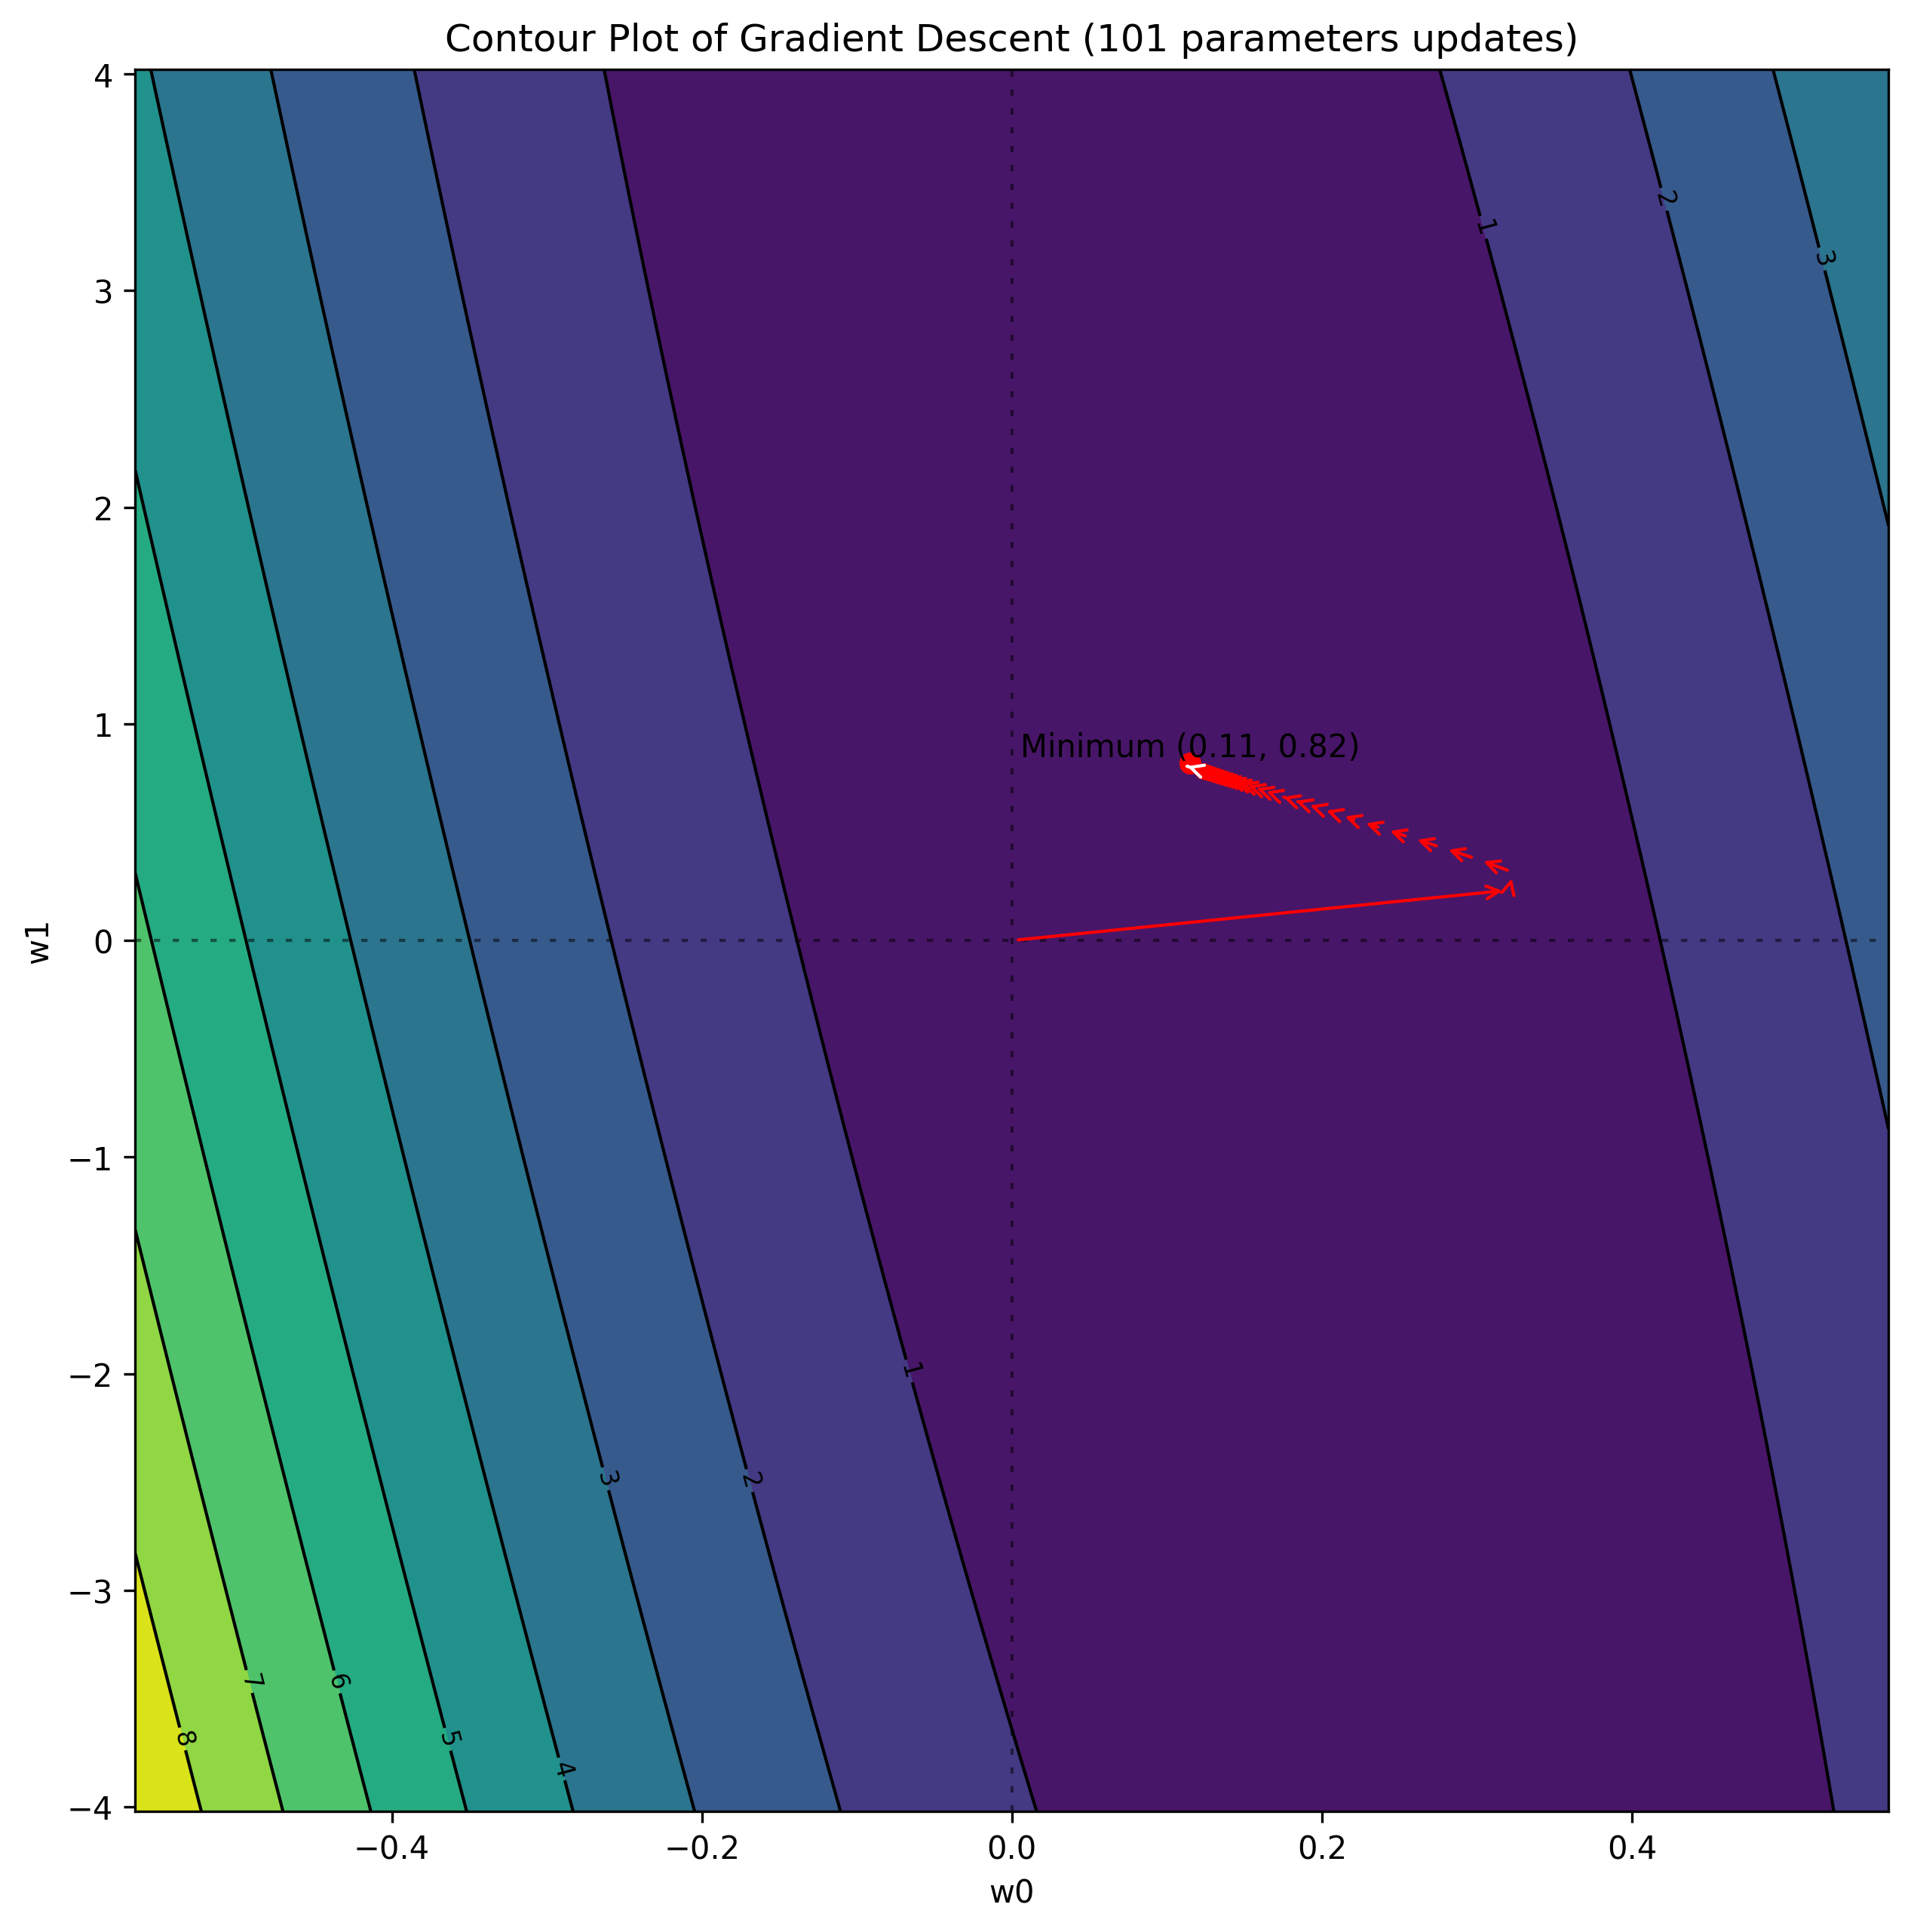

In [79]:
w = np.array([0, 0])
learning_rate = 0.01
num_iterations = 10000
tollerance = 1e-15


history = []
history.append(w)
errors= []

for iterations in range(num_iterations):
    gradient, loss = gradient_results(x_scaled, w, y_scaled)
    new_w = learning_rate * gradient
    
    errors.append(loss)
    
    if np.absolute(w - new_w).all() < tollerance:
        print(f"La discesa del gradiente ha convergente dopo {i} iterazioni.")
        break
    if iterations %100 == 0:
        history.append(w)
        errors.append(loss)
        
    w = w - new_w 
    
print(f"Errore valore minimo: {min(errors)}")
plot_contour(x_scaled, y_scaled, np.array(history))

## Stochastic Gradient Descent

Lo **Stochastic Gradient Descent** aggiorna i parametri del modello utilizzando i gradienti calcolati *una osservazione del dataset di addestramento per volta* in ogni iterazione. Nel codice fornito, i gradienti (dm e dc) vengono calcolati utilizzando **una singola osservazione del dataset**; i parametri (m e c) vengono aggiornati di conseguenza.

La **Stochastic Gradient Descent** può essere computazionalmente conveniente per set di dati di grandi dimensioni poiché l'aggiornamento dei parametri avviene ad ogni entry del dataset.

I passaggi principali coinvolti in un'implementazione *naive* di SGD sono i seguenti:

1 - Inizializzare i parametri del modello in modo casuale.
2 - Imposta iperparametri come learning_rate e numero di epoche.
3 - Ripeti per un numero specificato di epoche:
    1. Calcola una permutazione del set di train
    2. Per ogni esempio di allenamento:
        1. Calcolare il gradiente dei parametri del modello utilizzando l'esempio corrente.
        2. Aggiorna i parametri del modello sottraendo il tasso di apprendimento moltiplicato per il gradiente.
        3. Restituisci i parametri del modello ottimizzato.



Error min value: 9.463176824589798e-06


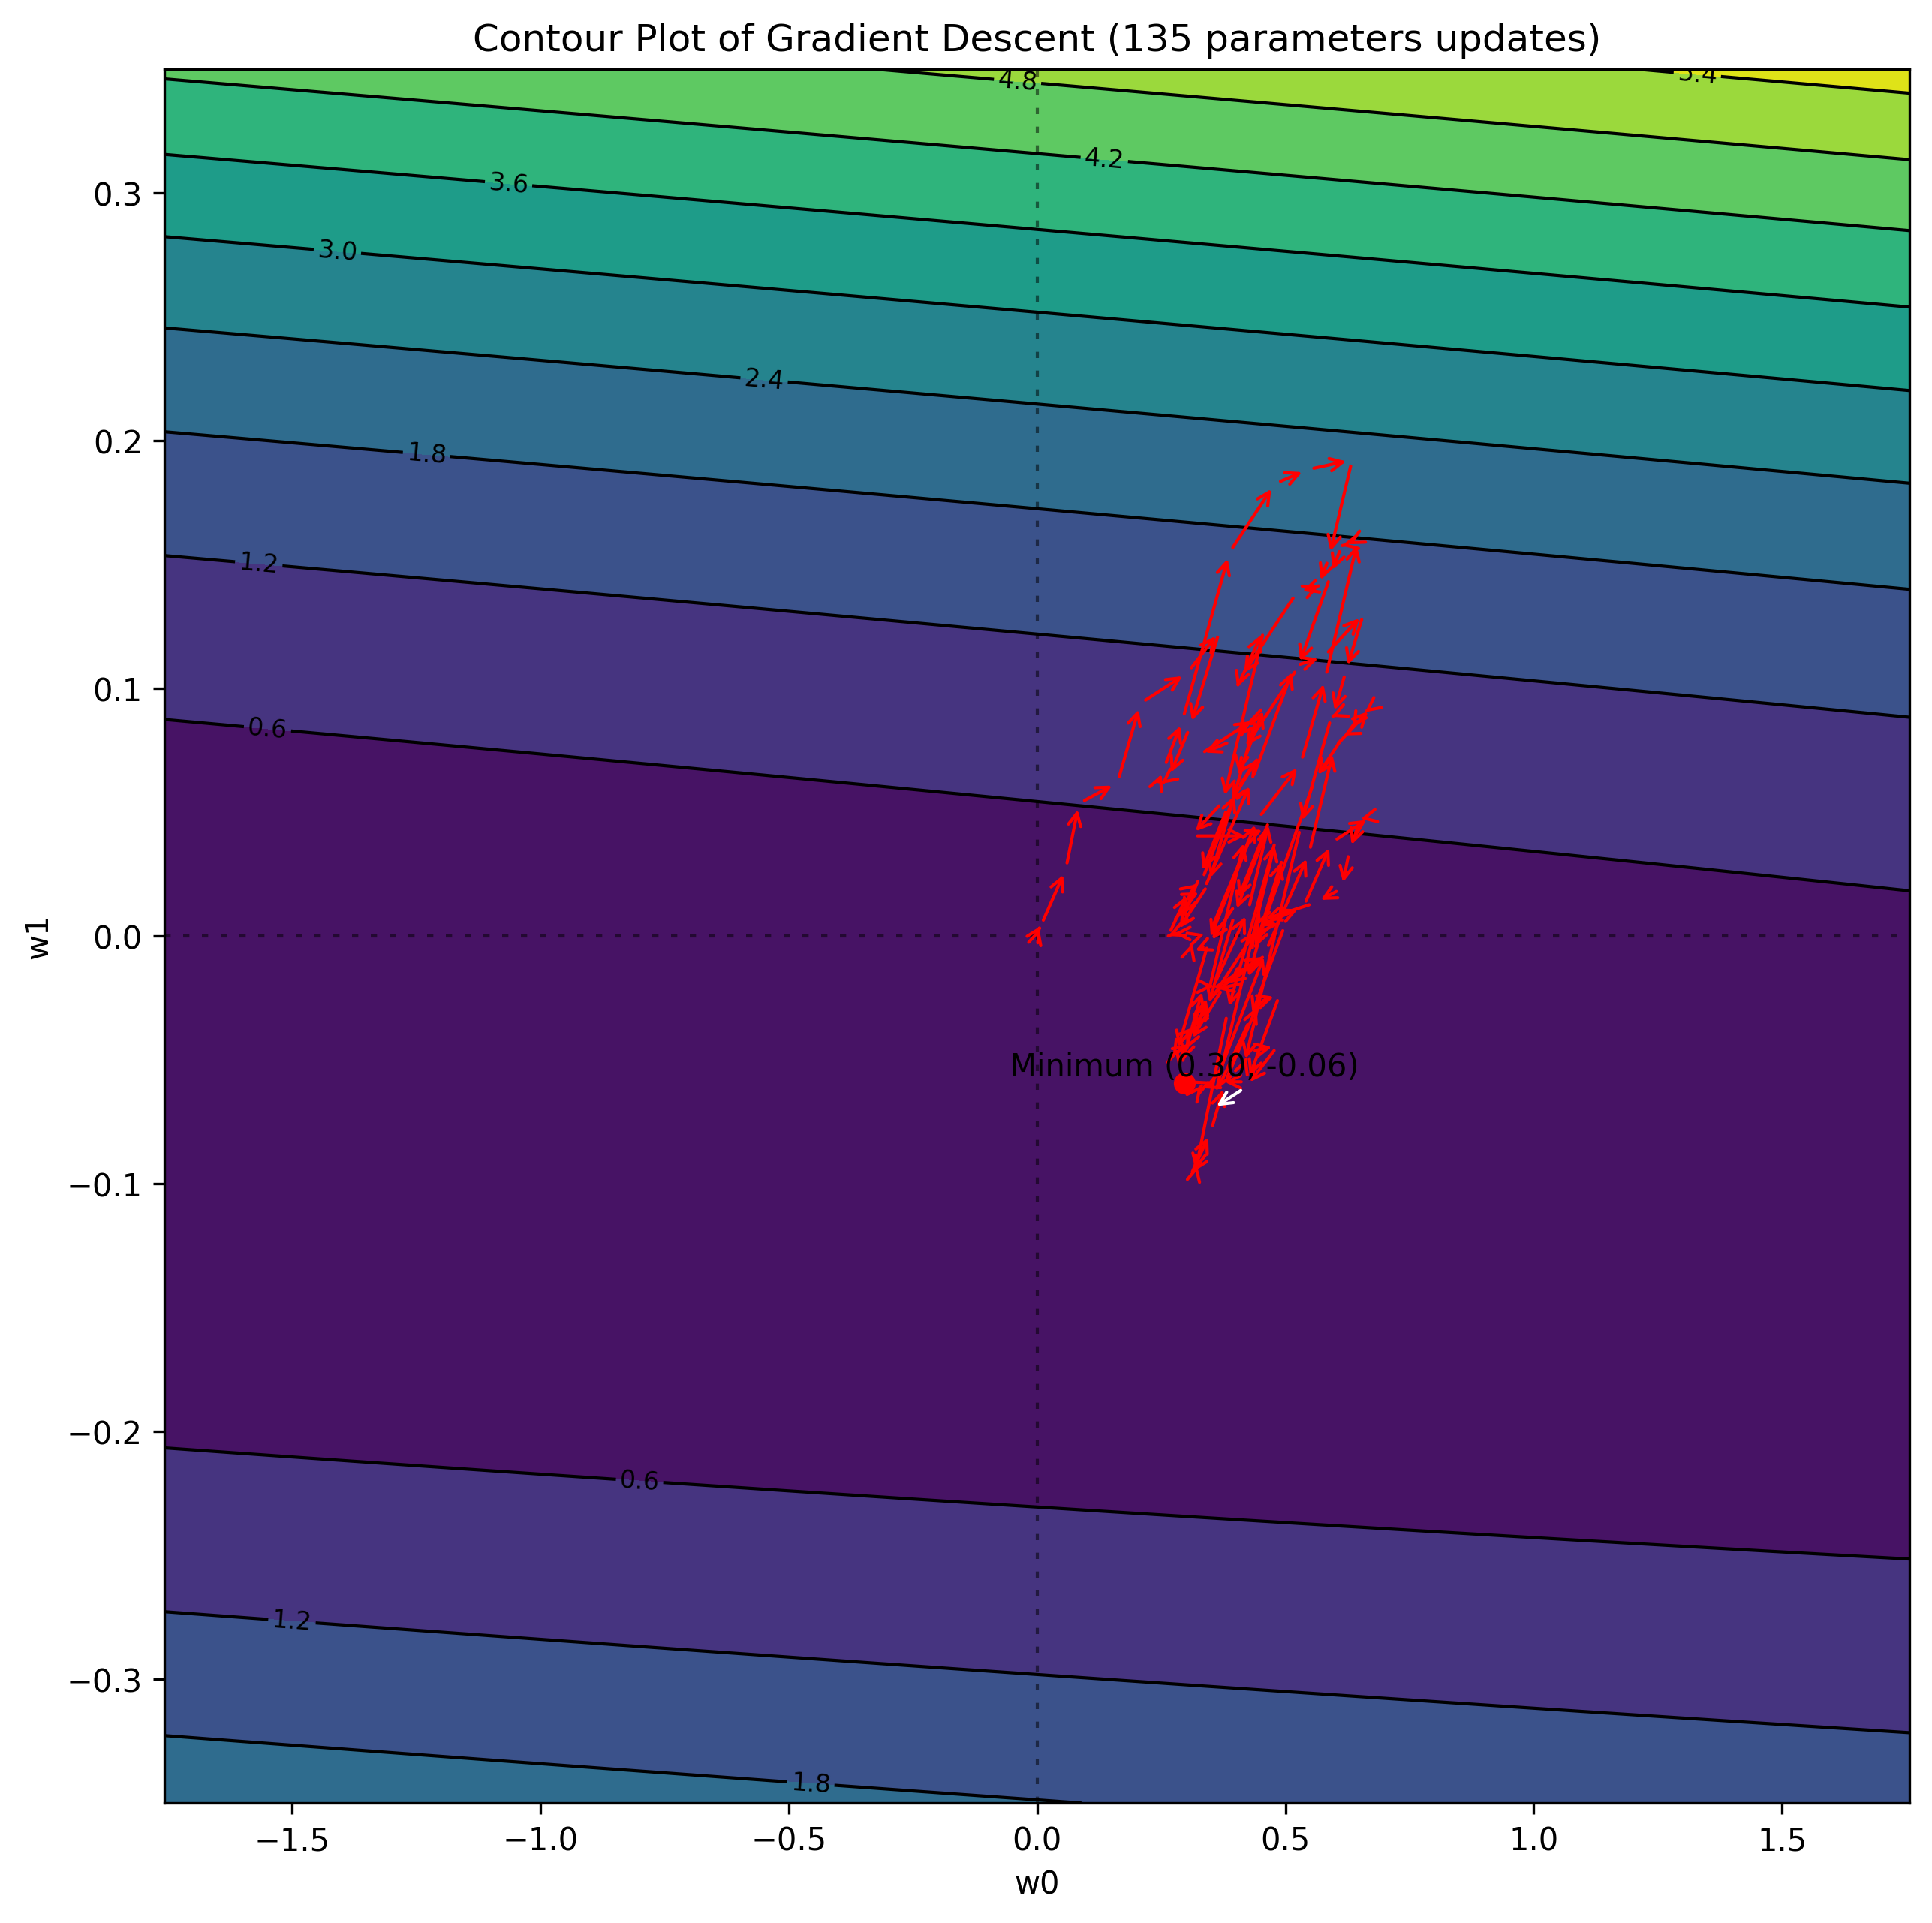

In [83]:
w = np.array([0, 0])
learning_rate = 0.1
num_iterations = 5
tolerance = 1e-15


history = []
errors = []
for epoch in range(num_iterations):
    shuffled_indices = np.random.permutation(x_scaled.shape[0])
    x_shuffled = x_scaled[shuffled_indices]
    y_shuffled = y_scaled[shuffled_indices]
    
    for i in range(len(x_shuffled)):
        gradient, loss = gradient_results(x_shuffled[i:i+1], w, y_scaled[i])
        new_w = learning_rate * gradient

        history.append(w)
        errors.append(loss)
        
        if np.absolute(w - new_w).all() < tolerance:
            print(f"Gradient Descent has converged after {i} iterations")
            break
        w = w - new_w


print(f"Error min value: {min(errors)}")
plot_contour(x_scaled, y_scaled, np.array(history))

## Mini-batch Gradient Descent

Mini-Batch Gradient Descent è una variante dell'algoritmo di Discesa del gradiente classica che aggiorna i parametri del modello utilizzando piccoli sottoinsiemi dei dati di addestramento chiamati mini-batch. 

Essa fornisce un certo equilibrio tra l'efficienza dell'SGD puro e la stabilità del Batch Gradient Descent ed è comunemente utilizzata per addestrare modelli di apprendimento automatico con grandi set di dati. La dimensione del mini-batch è un iperparametro che influenza il compromesso tra tempo di calcolo e fluidità della convergenza. Una corretta taratura della dimensione del mini-batch è importante per ottenere prestazioni ottimali.

Error min value: 0.05989775228160568


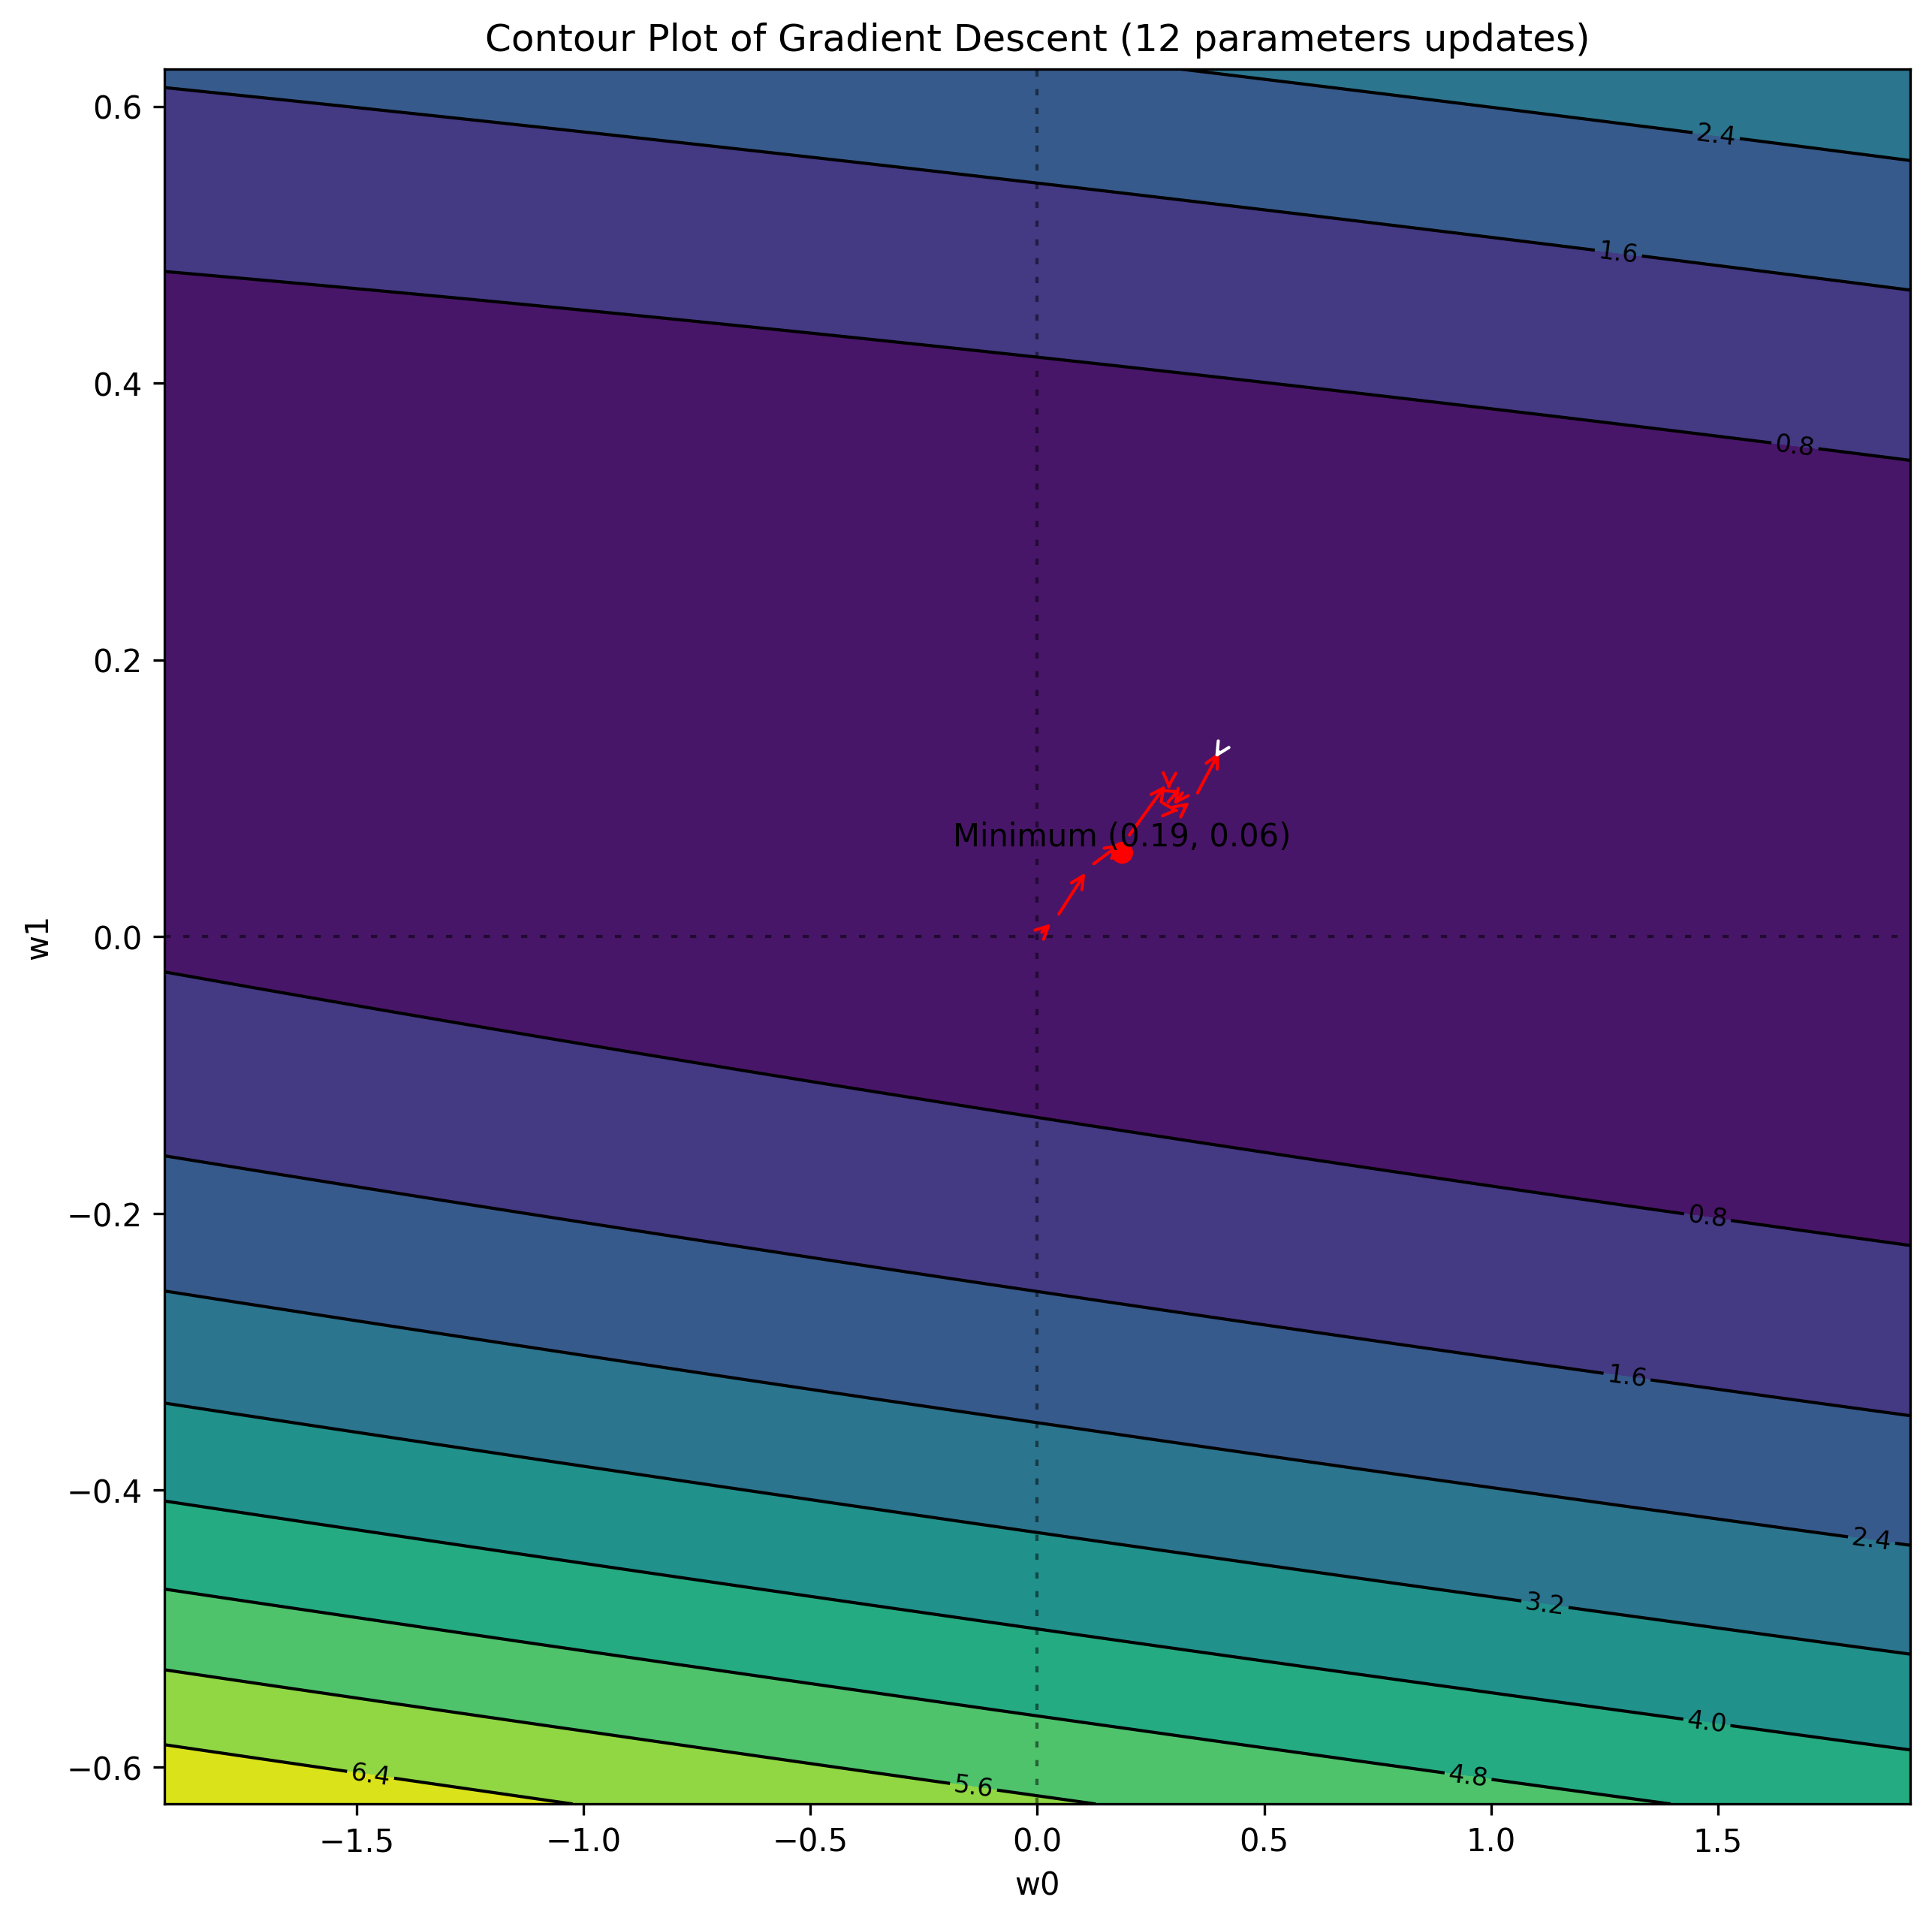

In [84]:

w = np.array([0, 0])
learning_rate = 0.1
num_iterations = 2
tolerance = 1e-15
batch_size = 5


history = []
errors = []
# Perform stochastic gradient descent
for epoch in range(num_iterations):
    shuffled_indices = np.random.permutation(x_scaled.shape[0])
    x_shuffled = x_scaled[shuffled_indices]
    y_shuffled = y_scaled[shuffled_indices]
    
    for i in range(0, len(x_shuffled), batch_size):
        gradient, loss = gradient_results(x_shuffled[i:i+batch_size], w, y_scaled[i:i+batch_size])
        new_w = learning_rate * gradient

        history.append(w)
        errors.append(loss)
        
        if np.absolute(w - new_w).all() < tolerance:
            print(f"Gradient Descent has converged after {i} iterations")
            break
        w = w - new_w


print(f"Error min value: {min(errors)}")
plot_contour(x_scaled, y_scaled, np.array(history))